In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("marks.csv")

In [5]:
df.head()

,study_time,Marks
0,600,90
1,550,88
2,500,85
3,450,77
4,400,71


In [7]:
y = df["Marks"]
y

0    90
1    88
2    85
3    77
4    71
5    67
Name: Marks, dtype: int64

In [28]:
X = df[["study_time"]]
X

,study_time
0,600
1,550
2,500
3,450
4,400
5,350


In [16]:
X.shape

(6, 1)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
linear= LinearRegression()

In [30]:
linear.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
linear.predict([[45]])

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36.91238095])

In [27]:
import numpy as np
np.corrcoef(X,y)

array([[1.        , 0.98329674],
       [0.98329674, 1.        ]])

In [36]:
r2 = linear.score(X, y)
r2

0.9668724717905045

In [38]:
y_predict=linear.predict(X)

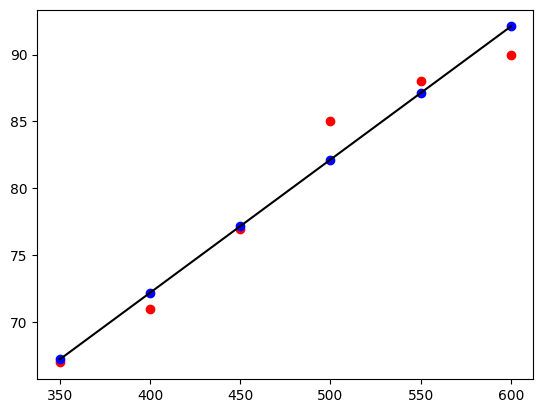

In [40]:
plt.scatter(X,y, c='red')
plt.scatter(X,y_predict, c='blue')
plt.plot(X,y_predict, c='black')

In [55]:
df_student=pd.read_csv("Student_performance.csv")


In [48]:
df_student.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [49]:
df_student.shape

(10000, 6)

In [50]:
y=df_student['Performance Index']
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [52]:
X=df_student.drop(columns =['Performance Index'])
X['Extracurricular Activities'] =X['Extracurricular Activities'].map({'Yes':1, 'No':0})
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [56]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2,random_state=42)

In [59]:
X_train.shape,y_train.shape

((8000, 5), (8000,))

In [62]:
X_test.shape,y_test.shape

((2000, 5), (2000,))

In [60]:
linear=LinearRegression()

In [61]:
linear.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
y_pred=linear.predict(X_test)
y_pred

array([54.71185392, 22.61551294, 47.90314471, ..., 16.79341955,
       63.34327368, 45.94262301], shape=(2000,))

In [64]:
y_test

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
6412    45.0
8285    66.0
7853    16.0
1095    65.0
6929    47.0
Name: Performance Index, Length: 2000, dtype: float64

In [66]:
r2 = linear.score(X_test, y_test)
r2

0.9889832909573145

In [67]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score

In [77]:
mse= mean_squared_error(y_test,y_pred)
rmse= root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse)
print(rmse)
r2

4.082628398521853
2.0205515085050054


0.9889832909573145

In [73]:
r3 = linear.score(X_train, y_train)
r3

0.9886898790682355

In [78]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [80]:
ridge= Ridge()

In [ ]:
grid_ridge_model = GridSearchCV